2/2 [==============================] - 0s 2ms/step
MSE: 0.0000


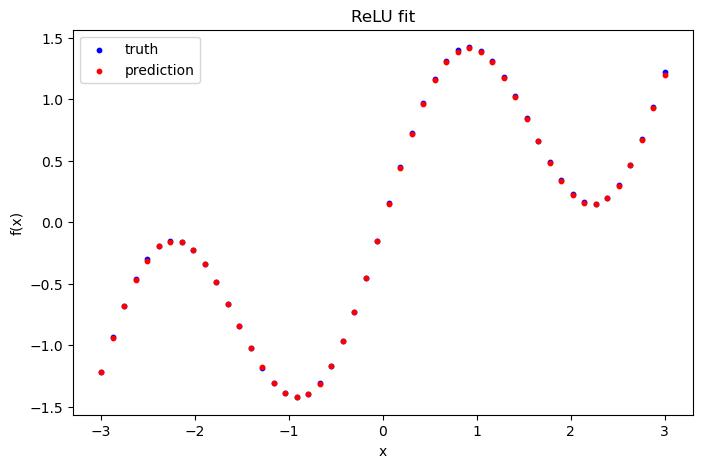

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#定义目标函数
def target_function(x):
    return np.sin(2 * x) + 0.5 * x

#生成数据
np.random.seed(42)
x_train = np.linspace(-3, 3, 100).reshape(-1, 1)
y_train = target_function(x_train)

x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
y_test = target_function(x_test)

#定义神经网络模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # 线性输出层
])

#编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')

#训练模型
history = model.fit(x_train, y_train, epochs=5000, verbose=0, validation_data=(x_test, y_test))

#预测
y_pred = model.predict(x_test)

#计算测试误差
test_loss = model.evaluate(x_test, y_test, verbose=0)
print(f"MSE: {test_loss:.4f}")

#绘图对比
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, label='truth', color='blue', s=10)
plt.scatter(x_test, y_pred, label='prediction', color='red', s=10)
plt.legend()
plt.title('ReLU fit')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()
